In [20]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [21]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input /255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [22]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#최상의 검증 점수를 만드는 모델을 자동으로 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [24]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3110382791757584, 0.88808334]

#### epochs가 많이 늘어나면 너무 오래 걸린다.
# early stopping
#### early stopping : 조기 종료 검증 점수가 상승하기 시작하면 그 이후에는 과대 적합이 더 커지기 때문에 훈련을 계속할 필요가 없다.->과대 적합이 시작되기 전에 학습을중지.

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) #2개 더보고 더 좋은게 업없으면 중지, 2개전(최적이었던 것)으로 모델 돌림

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 10s 215us/sample - loss: 0.5920 - accuracy: 0.7918 - val_loss: 0.4472 - val_accuracy: 0.8367
Epoch 2/20
48000/48000 [==============================] - 9s 196us/sample - loss: 0.4398 - accuracy: 0.8415 - val_loss: 0.3943 - val_accuracy: 0.8597
Epoch 3/20
48000/48000 [==============================] - 9s 197us/sample - loss: 0.4053 - accuracy: 0.8520 - val_loss: 0.3741 - val_accuracy: 0.8612
Epoch 4/20
48000/48000 [==============================] - 10s 206us/sample - loss: 0.3871 - accuracy: 0.8598 - val_loss: 0.3505 - val_accuracy: 0.8723
Epoch 5/20
48000/48000 [==============================] - 10s 211us/sample - loss: 0.3691 - accuracy: 0.8658 - val_loss: 0.3488 - val_accuracy: 0.8715
Epoch 6/20
48000/48000 [==============================] - 11s 223us/sample - loss: 0.3546 - accuracy: 0.8694 - val_loss: 0.3491 - val_accuracy: 0.8672
Epoch 7/20
48000/48000 [======================

In [26]:
print(early_stopping_cb.stopped_epoch)

11


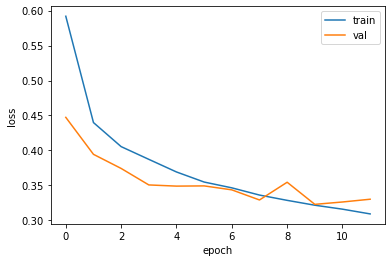

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-07', dpi=300)
plt.show()

In [28]:
model.evaluate(val_scaled,val_target)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.32269046941399576, 0.8795]

In [29]:
model2 = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.32269046941399576, 0.8795]

In [30]:
#로지스틱 회귀의 경우
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
train_scaled2 = train_scaled.reshape(-1,28*28)
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled2, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/Users/simsanghyeog/opt/anaconda3/envs/tfconda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/Users/simsanghyeog/opt/anaconda3/envs/tfconda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/Users/simsanghyeog/opt/anaconda3/envs/tfconda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/Users/simsanghyeog/opt/anaconda3/envs/tfconda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached bef

0.7895416666666667
